In [33]:
'/content/drive/My Drive/dataset/archive.zip'

'/content/drive/My Drive/dataset/archive.zip'

In [47]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [48]:
cp '/content/drive/My Drive/dataset/archive.zip' './'

cp: cannot stat '/content/drive/My Drive/dataset/archive.zip': No such file or directory


In [29]:
!unzip '/content/archive.zip'

Archive:  /content/archive.zip
replace student-mat.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: student-mat.csv         
replace student-merge.R? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: student-merge.R         
replace student-por.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: student-por.csv         


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('/content/student-mat.csv')
df=pd.read_csv('/content/student-por.csv')

In [7]:
df.shape

(649, 33)

In [8]:
df.dtypes 

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [9]:
# Dropping irrelevant columns
df = df.drop(columns =['school','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian','traveltime','failures','nursery','higher','internet'])
df.shape 
df.head(5)

,sex,age,studytime,schoolsup,famsup,paid,activities,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,2,yes,no,no,no,no,4,3,4,1,1,3,4,0,11,11
1,F,17,2,no,yes,no,no,no,5,3,3,1,1,3,2,9,11,11
2,F,15,2,yes,no,no,no,no,4,3,2,2,3,3,6,12,13,12
3,F,15,3,no,yes,no,yes,yes,3,2,2,1,1,5,0,14,14,14
4,F,16,2,no,yes,no,no,no,4,3,2,1,2,5,0,11,13,13


In [10]:
df.shape

(649, 18)

In [11]:
df.describe()

,age,studytime,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,1.930663,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,0.829510,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,2.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [12]:
# cek duplicate
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows:",duplicate_rows_df.shape)

Number of duplicate rows: (0, 18)


In [13]:
#hapus duplicate
df=df.drop_duplicates()

In [14]:
df.count() 

sex           649
age           649
studytime     649
schoolsup     649
famsup        649
paid          649
activities    649
romantic      649
famrel        649
freetime      649
goout         649
Dalc          649
Walc          649
health        649
absences      649
G1            649
G2            649
G3            649
dtype: int64

In [15]:
#Finding null values
print(df.isnull().sum())

sex           0
age           0
studytime     0
schoolsup     0
famsup        0
paid          0
activities    0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


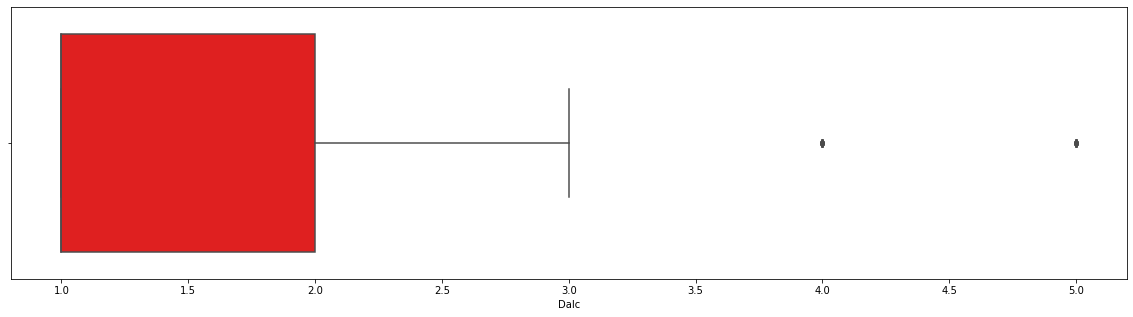

In [16]:
#Plotting boxplots to find outliers
#plot for Dalc variable
plt.figure(figsize=(20,5))
sns.boxplot(x=df['Dalc'],color='Red')
#Risvani

In [17]:
print("First Quartile, Q1=", df['goout'].quantile(0.25))
print("Second Quartile/Median, Q2=", df['goout'].median())
print("third Quartile, Q3=", df['goout'].quantile(0.75))

First Quartile, Q1= 2.0
Second Quartile/Median, Q2= 3.0
third Quartile, Q3= 4.0


In [18]:

q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1
print("\nIQR=\n,IQR")
df1=df[~((df<(q1-1.5*IQR))|(df>(q3+1.5*IQR))).any(axis=1)]
df1.head(5)
df1.shape


IQR=
,IQR


(463, 18)

Alkohol VS Jenis Kelamin

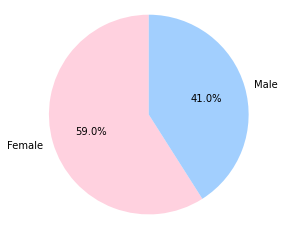

In [19]:
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(df['sex'].value_counts().tolist(), 
        labels=['Female', 'Male'], colors=['#ffd1df', '#a2cffe'], 
        autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


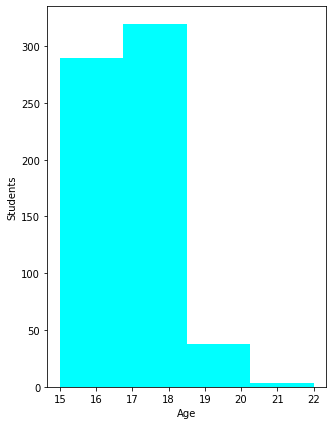

In [20]:
#kelompok umur yang paling berpengaruh dengan Alkohol
fig, ax = plt.subplots(figsize=(5,7))
sns.distplot(df['age'],  
             hist_kws={"alpha": 1, "color": "cyan"}, 
             kde=False, bins=4)
ax = ax.set(ylabel="Students", xlabel="Age")

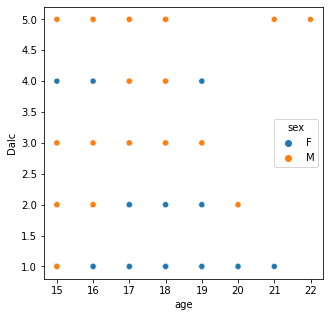

In [21]:

plt.figure(figsize=(5,5))
sns.scatterplot(x = df['age'],y = df['Dalc'],hue =df['sex'])

Alkahol mepengerahui nilai Siswa

In [22]:
df['Dalc'] = df['Dalc'] + df['Walc']

Text(0.5, 0, 'Weekly alcohol consumption')

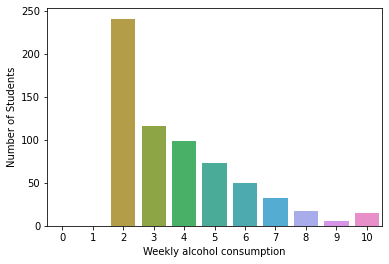

In [23]:
#Semua siswa kosumsi Alkohol minimal 2 kali dalam seminggu 
list = []
for i in range(11):
    list.append(len(df[df.Dalc == i]))
ax = sns.barplot(x = [0,1,2,3,4,5,6,7,8,9,10], y = list)
plt.ylabel('Number of Students')
plt.xlabel('Weekly alcohol consumption')

Text(0.5, 0, 'Students grade distribution according to weekly alcohol consumption')

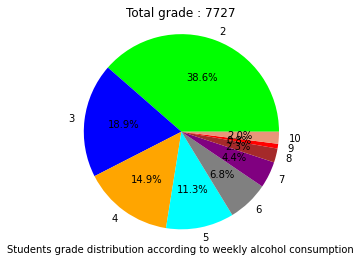

In [24]:
#Alkohol memepengaruhi nilai siswa 
labels = ['2','3','4','5','6','7','8','9','10']
colors = ['lime','blue','orange','cyan','grey','purple','brown','red','darksalmon']
explode = [0,0,0,0,0,0,0,0,0]
sizes = []
for i in range(2,11):
    sizes.append(sum(df[df.Dalc == i].G3))
total_grade = sum(sizes)
average = total_grade/float(len(df))
plt.pie(sizes,explode=explode,colors=colors,labels=labels,autopct = '%1.1f%%')
plt.axis('equal')
plt.title('Total grade : '+str(total_grade))
plt.xlabel('Students grade distribution according to weekly alcohol consumption')